In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(10).all():
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [8]:
for row in session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation ).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [9]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [10]:
#second method

most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)


2017-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")- dt.timedelta(days= 365)
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
dfprp = pd.DataFrame(results, columns=['date', 'precipitation'])



In [23]:
dfprp.set_index('date', inplace=True)
dfprp.sort_index(inplace=True)

dfprp.plot(title="Precipitation Analysis", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'dfprp' is not defined

In [22]:
dfprp.describe()

NameError: name 'dfprp' is not defined

In [18]:
session.query(Station.station).group_by(Station.station).count()

9

In [21]:
item_counts = (
    session.query(Measurement.station, func.count(Measurement.station).label('item_count'))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

for item_name, count in item_counts:
    print(f"{item_name}, {count}")

USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511


In [24]:
most_active_station = item_counts[0][0]  # This takes the station ID of the most active station from your item_counts list

# Query to find the lowest, highest, and average temperature
temperature_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station)
    .all()
)

min_temp, max_temp, avg_temp = temperature_stats[0]
print(f"{min_temp}, {max_temp}, {avg_temp:.2f}")

54.0, 85.0, 71.66


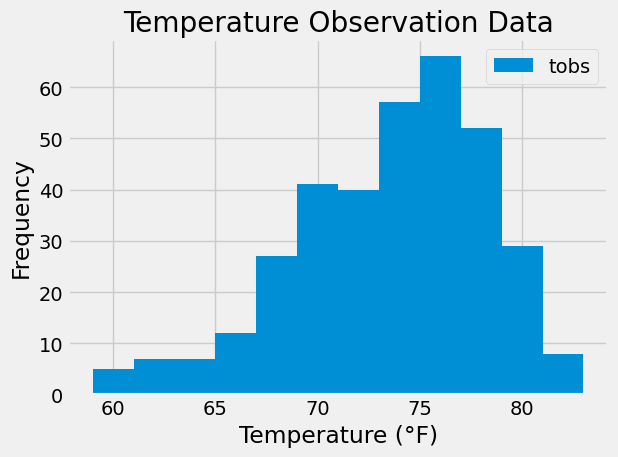

In [25]:
most_active_station = item_counts[0][0]  # Make sure this is correctly assigned

# Calculate the date one year from the last date in the dataset
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for this station
temperature_results = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station)
    .filter(Measurement.date >= one_year_ago)
    .order_by(Measurement.date)
    .all()
)

temperature_df = pd.DataFrame(temperature_results, columns=['tobs'])

temperature_df.plot.hist(bins=12, title="Temperature Observation Data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()  
plt.show()

In [ ]:
session.close()